Depression is a serious mental illness that can be identified by its distinctive symptoms, which include feelings of melancholy and emptiness, worry and sleep disturbances, as well as a general loss of initiative and interest in activities. Additionally, symptoms such as feelings of guilt or worthlessness, decreased energy, difficulties concentrating, suicidal ideation and psychotic symptoms may be present. The number, severity and duration of symptoms, as well as the impact on the ability to function socially and at work, are factors that determine the severity of depression. Anxiety is a natural response to stress, and there are situations where it can be really helpful. It can alert us to potential threats, help us prepare for them, and aid concentration. Anxiety disorders are different from everyday feelings of worry or anxiety because they involve abnormally high levels of these emotions. Anxiety disorders are the most common type of mental illness, affecting around one in four people at some point in their lives. However, these disorders can be treated, and there are several therapies that have been shown to be effective. Most patients benefit from treatment, which allows them to lead normal, productive lives. Depression and anxiety are very common among students, which affects students' studies and social behavior. The dataset is collected from college students of University of Lahore. There are 787 participants who contributed data. This dataset is generated from the inspiration of the Beck Depression and Beck Anxiety inventories.
This dataset can be used as a basis for evaluating different machine learning methods and approaches, such as classifying the severity of depression and anxiety. Furthermore, it is suitable for comparing different machine learning classification approaches.

In [1]:
import warnings
# Use the warnings filter to suppress warnings
warnings.filterwarnings("ignore")

| **Column** | **Description** |
| ------------ | :-----------------: |
| id | each number is a participant in the experiment |
| school_year | years in school |
| age | age of respondence|
| gender |class of Sex |
| bmi | body mass index |
| who_bmi | bmi category |
| phq_score | measure the severity of symptoms related to depression, anxiety, and other related disorders in patients |
| depression_severity | degree or intensity of symptoms experienced by an individual with depression |
| depressiveness | |
| suicidal | the candidate have suicide thought |
| depression_diagnosis | the candidate already have depression diagnosis |
| depression_treatment | the candidate already have depression treatment |
| gad_score | measure that assesses the severity of Generalized Anxiety Disorder |
| anxiousness | |
| anxiety_diagnosis | the candidate already have anxiety diagnosis |
| anxiety_treatment | the candidate already have anxiety treatment |
| epworth_score |  score to assess daytime sleepiness ytime sleepiness |
| sleepiness | |
| anxiety_severity | (Target) intensity of symptoms experienced by an individual with anxiety |

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import seaborn as sns
from scipy.stats import skew
from pyswarm import pso

In [3]:
#importation of data
df = pd.read_csv('depression_anxiety_data.csv')

In [4]:
#data frame head
df.head()

id  school_year  age  gender        bmi          who_bmi  phq_score  \
0   1            1   19    male  33.333333  Class I Obesity          9   
1   2            1   18    male  19.841270           Normal          8   
2   3            1   19    male  25.102391       Overweight          8   
3   4            1   18  female  23.738662           Normal         19   
4   5            1   18    male  25.617284       Overweight          6   

  depression_severity depressiveness suicidal depression_diagnosis  \
0                Mild          False    False                False   
1                Mild          False    False                False   
2                Mild          False    False                False   
3   Moderately severe           True     True                False   
4                Mild          False    False                False   

  depression_treatment  gad_score anxiety_severity anxiousness  \
0                False         11         Moderate        True   
1                False          5             Mild       False   
2                False          6             Mild       False   
3                False         15           Severe        True   
4                False         14         Moderate        True   

  anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
0             False             False            7.0      False  
1             False             False           14.0       True  
2             False             False            6.0      False  
3             False             False           11.0       True  
4             False             False            3.0      False

In [5]:
df["anxiety_severity"].unique()
labels=['Moderate', 'Mild', 'Severe', 'None-minimal', 'No label (NaN)']
level = df["anxiety_severity"].value_counts().tolist()
values = [level[0], level[1],level[2],level[3],level[4]]

fig = px.pie(values=df["anxiety_severity"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black", 'blue']
             ,title="levels of anxiety exibitable ")
fig.show()

In [6]:
df.tail()

id  school_year  age  gender        bmi     who_bmi  phq_score  \
778  779            4   24  female  21.096191      Normal          6   
779  780            4   22    male  25.308642  Overweight          4   
780  781            4   22    male  22.720438      Normal          2   
781  782            4   22  female  23.033168      Normal         17   
782  783            4   22    male  22.598140      Normal          6   

    depression_severity depressiveness suicidal depression_diagnosis  \
778                Mild          False    False                False   
779        None-minimal          False    False                False   
780        None-minimal          False    False                False   
781   Moderately severe           True    False                False   
782                Mild          False    False                False   

    depression_treatment  gad_score anxiety_severity anxiousness  \
778                False          1     None-minimal       False   
779                False          6             Mild       False   
780                False          5             Mild       False   
781                False         19           Severe        True   
782                False          6             Mild       False   

    anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
778             False             False            3.0      False  
779             False             False            3.0      False  
780             False             False            4.0      False  
781             False             False           15.0       True  
782             False             False            0.0      False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [8]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [9]:
df.select_dtypes('object').describe().transpose()

count unique     top freq
gender                 783      2  female  403
who_bmi                783      7  Normal  510
depression_severity    779      6    Mild  344
depressiveness         780      2   False  569
suicidal               782      2   False  713
depression_diagnosis   782      2   False  716
depression_treatment   779      2   False  722
anxiety_severity       783      5    Mild  303
anxiousness            777      2   False  587
anxiety_diagnosis      779      2   False  718
anxiety_treatment      781      2   False  721
sleepiness             775      2   False  634

In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

count       mean       std   min       25%        50%  \
school_year    783.0   2.277139  1.163633   1.0   1.00000   2.000000   
age            783.0  20.233716  1.767217  18.0  19.00000  20.000000   
bmi            783.0  23.420533  4.563630   0.0  20.98942  23.140496   
phq_score      783.0   7.123883  4.426580   0.0   4.00000   6.000000   
gad_score      783.0   6.810983  4.727352   0.0   3.00000   6.000000   
epworth_score  775.0   6.376774  3.996443   0.0   3.50000   6.000000   

                     75%        max  
school_year     3.000000   4.000000  
age            21.000000  31.000000  
bmi            25.519924  54.552668  
phq_score       9.000000  24.000000  
gad_score       9.000000  21.000000  
epworth_score   9.000000  32.000000

In [11]:

null_rows = df[df.isnull().any(axis=1)]
num_null_rows = null_rows.shape[0]

print(f"Number of rows with at least one null value: {num_null_rows}")



Number of rows with at least one null value: 18


In [12]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['number'])

print("Numerical Columns:")
print(numerical_columns.columns)


Numerical Columns:
Index(['id', 'school_year', 'age', 'bmi', 'phq_score', 'gad_score',
       'epworth_score'],
      dtype='object')


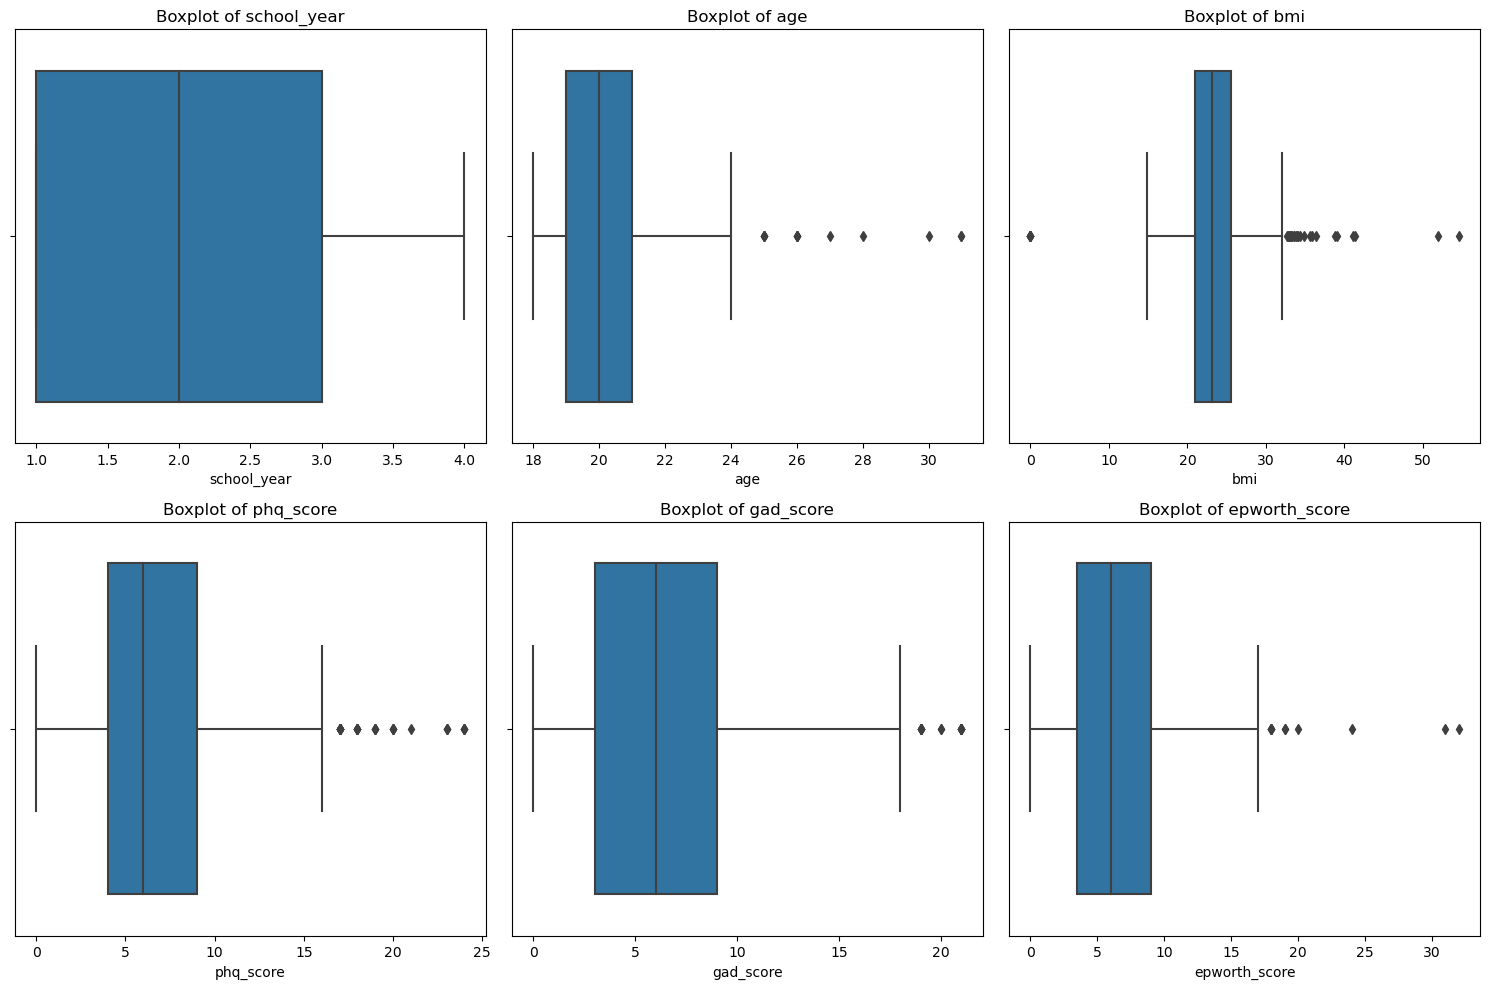

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['number']).drop('id', axis=1)

# Calculate the number of required subplots
num_columns = len(numerical_columns.columns)
num_subplots = 3
num_rows = (num_columns + num_subplots - 1) // num_subplots  # Calculate the number of rows

# Set up subplots for boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=numerical_columns[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove empty subplots
for j in range(num_columns, num_rows*num_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


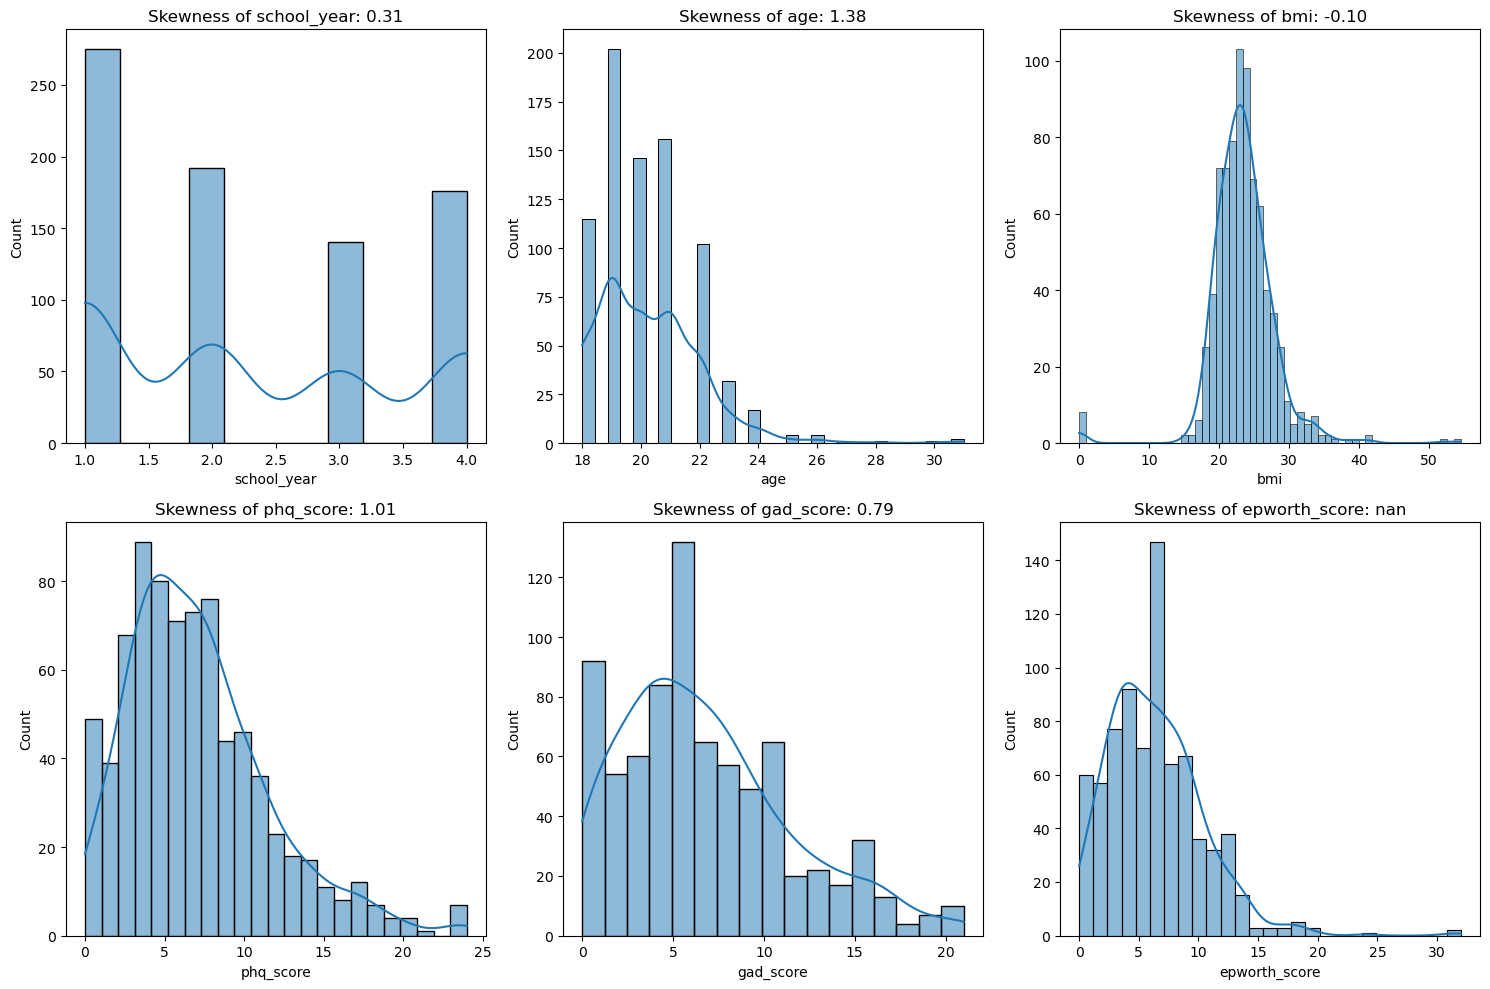

In [14]:
numerical_columns = df.select_dtypes(include=['number']).drop('id', axis=1)

# Calculate the number of required subplots
num_columns = len(numerical_columns.columns)
num_subplots = 3
num_rows = (num_columns + num_subplots - 1) // num_subplots  # Calculate the number of rows

# Set up subplots for skewness
fig, axes = plt.subplots(nrows=num_rows, ncols=num_subplots, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot skewness for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.histplot(numerical_columns[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Skewness of {column}: {skew(numerical_columns[column]):.2f}')

# Remove empty subplots
for j in range(num_columns, num_rows*num_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


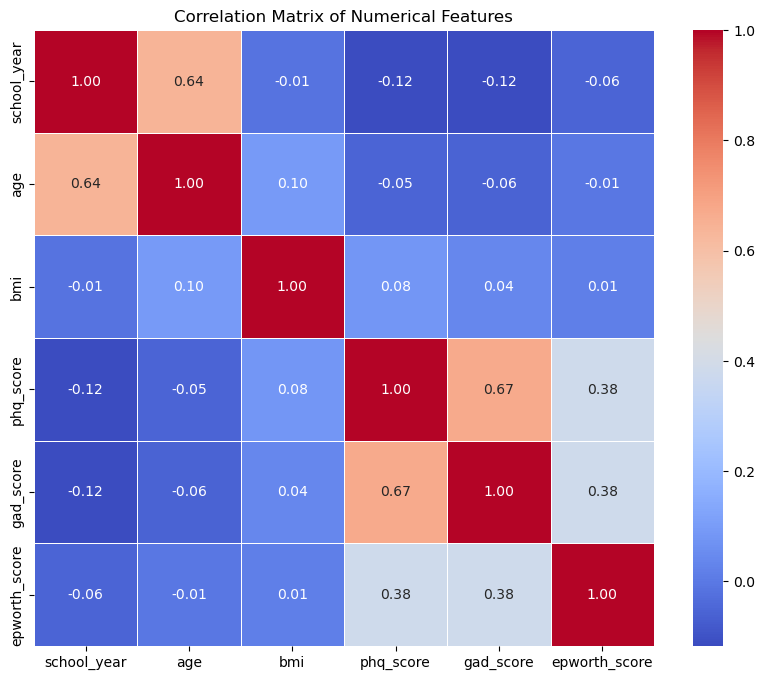

In [15]:
numerical_columns = df.select_dtypes(include=['number']).drop('id', axis=1)

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [16]:


fig = px.histogram(df, x='gender', color='gender', title='Gender Distribution')
fig.show()


In [17]:
fig = px.histogram(df, x='age', title='Age Distribution')
fig.show()


In [18]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, labels=dict(color='Correlation'), title='Correlation Matrix')
fig.show()


In [19]:
fig = px.box(df, y=['phq_score', 'gad_score'], points="all", title='Box Plots for PHQ and GAD Scores')
fig.show()


In [20]:
fig = px.scatter(df, x='age', y='bmi', color='gender', title='Age vs. BMI')
fig.show()


In [21]:
fig = px.scatter_3d(df, x='age', y='gad_score', color='gender', title='GAD Score Trend Across Age Groups')
fig.show()


In [22]:
#checking out columns with missing values
df.isna().any()

id                      False
school_year             False
age                     False
gender                  False
bmi                     False
who_bmi                 False
phq_score               False
depression_severity      True
depressiveness           True
suicidal                 True
depression_diagnosis     True
depression_treatment     True
gad_score               False
anxiety_severity        False
anxiousness              True
anxiety_diagnosis        True
anxiety_treatment        True
epworth_score            True
sleepiness               True
dtype: bool

In [23]:
df_temp = df.dropna(axis=0)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    765 non-null    int64  
 1   school_year           765 non-null    int64  
 2   age                   765 non-null    int64  
 3   gender                765 non-null    object 
 4   bmi                   765 non-null    float64
 5   who_bmi               765 non-null    object 
 6   phq_score             765 non-null    int64  
 7   depression_severity   765 non-null    object 
 8   depressiveness        765 non-null    object 
 9   suicidal              765 non-null    object 
 10  depression_diagnosis  765 non-null    object 
 11  depression_treatment  765 non-null    object 
 12  gad_score             765 non-null    int64  
 13  anxiety_severity      765 non-null    object 
 14  anxiousness           765 non-null    object 
 15  anxiety_diagnosis     7

In [24]:
df_temp.gender = df_temp.gender.map({'male':1, 'female':0})

In [25]:
df_temp['depressiveness'] = df_temp['depressiveness'].astype(int)
df_temp

id  school_year  age  gender        bmi          who_bmi  phq_score  \
0      1            1   19       1  33.333333  Class I Obesity          9   
1      2            1   18       1  19.841270           Normal          8   
2      3            1   19       1  25.102391       Overweight          8   
3      4            1   18       0  23.738662           Normal         19   
4      5            1   18       1  25.617284       Overweight          6   
..   ...          ...  ...     ...        ...              ...        ...   
778  779            4   24       0  21.096191           Normal          6   
779  780            4   22       1  25.308642       Overweight          4   
780  781            4   22       1  22.720438           Normal          2   
781  782            4   22       0  23.033168           Normal         17   
782  783            4   22       1  22.598140           Normal          6   

    depression_severity  depressiveness suicidal depression_diagnosis  \
0                  Mild               0    False                False   
1                  Mild               0    False                False   
2                  Mild               0    False                False   
3     Moderately severe               1     True                False   
4                  Mild               0    False                False   
..                  ...             ...      ...                  ...   
778                Mild               0    False                False   
779        None-minimal               0    False                False   
780        None-minimal               0    False                False   
781   Moderately severe               1    False                False   
782                Mild               0    False                False   

    depression_treatment  gad_score anxiety_severity anxiousness  \
0                  False         11         Moderate        True   
1                  False          5             Mild       False   
2                  False          6             Mild       False   
3                  False         15           Severe        True   
4                  False         14         Moderate        True   
..                   ...        ...              ...         ...   
778                False          1     None-minimal       False   
779                False          6             Mild       False   
780                False          5             Mild       False   
781                False         19           Severe        True   
782                False          6             Mild       False   

    anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
0               False             False            7.0      False  
1               False             False           14.0       True  
2               False             False            6.0      False  
3               False             False           11.0       True  
4               False             False            3.0      False  
..                ...               ...            ...        ...  
778             False             False            3.0      False  
779             False             False            3.0      False  
780             False             False            4.0      False  
781             False             False           15.0       True  
782             False             False            0.0      False  

[765 rows x 19 columns]

In [26]:
df_temp['suicidal'] = df_temp['suicidal'].astype(int)

In [27]:
df_temp['depression_diagnosis'] = df_temp['depression_diagnosis'].astype(int)

In [28]:
df_temp['depression_treatment'] = df_temp['depression_treatment'].astype(int)

In [29]:
df_temp['anxiousness'] = df_temp['anxiousness'].astype(int)

In [30]:
df_temp['anxiety_diagnosis'] = df_temp['anxiety_diagnosis'].astype(int)

In [31]:
df_temp['anxiety_treatment'] = df_temp['anxiety_treatment'].astype(int)

In [32]:
df_temp['sleepiness'] = df_temp['sleepiness'].astype(int)

In [33]:
df_temp['who_bmi'].unique()

array(['Class I Obesity', 'Normal', 'Overweight', 'Not Availble',
       'Class III Obesity', 'Underweight', 'Class II Obesity'],
      dtype=object)

In [34]:
df_temp['depression_severity'].unique()

array(['Mild', 'Moderately severe', 'None-minimal', 'Moderate', 'Severe',
       'none'], dtype=object)

In [35]:
df_temp['anxiety_severity'].unique()

array(['Moderate', 'Mild', 'Severe', 'None-minimal'], dtype=object)

In [36]:
df_temp = pd.get_dummies(df_temp, columns=['who_bmi'
                                          ,'depression_severity'
                                          ,'anxiety_severity'], drop_first=True)

In [37]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 782
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     765 non-null    int64  
 1   school_year                            765 non-null    int64  
 2   age                                    765 non-null    int64  
 3   gender                                 765 non-null    int64  
 4   bmi                                    765 non-null    float64
 5   phq_score                              765 non-null    int64  
 6   depressiveness                         765 non-null    int32  
 7   suicidal                               765 non-null    int32  
 8   depression_diagnosis                   765 non-null    int32  
 9   depression_treatment                   765 non-null    int32  
 10  gad_score                              765 non-null    int64  
 11  anxiou

**Columns with missing data:**

- depression_severity

- depressiveness

- suicidal

- depression_diagnosis

- depression_trearment

- anxiousness

- anxiety_diagnosis

- anxiety_treatment

- epworth_score

- sleepiness

In [38]:
df_temp.corr()

id  school_year       age  \
id                                     1.000000     0.957983  0.657784   
school_year                            0.957983     1.000000  0.637692   
age                                    0.657784     0.637692  1.000000   
gender                                -0.011716    -0.016093  0.030214   
bmi                                    0.002906    -0.010453  0.097000   
phq_score                             -0.122582    -0.124790 -0.064811   
depressiveness                        -0.074063    -0.073929 -0.037974   
suicidal                              -0.046727    -0.063403 -0.046948   
depression_diagnosis                   0.020873     0.003725  0.065720   
depression_treatment                  -0.019056    -0.040394  0.034627   
gad_score                             -0.119837    -0.126581 -0.070538   
anxiousness                           -0.135580    -0.139753 -0.071614   
anxiety_diagnosis                      0.020170     0.018108  0.055279   
anxiety_treatment                     -0.021294    -0.033786  0.004997   
epworth_score                         -0.048113    -0.055395 -0.008501   
sleepiness                            -0.034782    -0.027368 -0.007734   
who_bmi_Class II Obesity              -0.040173    -0.047896  0.015683   
who_bmi_Class III Obesity             -0.089775    -0.064562 -0.010540   
who_bmi_Normal                        -0.026530    -0.006054 -0.064946   
who_bmi_Not Availble                  -0.042144    -0.025457 -0.036709   
who_bmi_Overweight                     0.081206     0.060792  0.098093   
who_bmi_Underweight                    0.016614     0.015492 -0.021237   
depression_severity_Moderate          -0.068353    -0.053600 -0.015485   
depression_severity_Moderately severe -0.028234    -0.030170 -0.041519   
depression_severity_None-minimal       0.068521     0.072077  0.035965   
depression_severity_Severe            -0.047119    -0.067330  0.005403   
depression_severity_none               0.092762     0.094285  0.059279   
anxiety_severity_Moderate             -0.091042    -0.087632 -0.023893   
anxiety_severity_None-minimal          0.013224     0.015174  0.006701   
anxiety_severity_Severe               -0.089138    -0.100037 -0.078841   

                                         gender       bmi  phq_score  \
id                                    -0.011716  0.002906  -0.122582   
school_year                           -0.016093 -0.010453  -0.124790   
age                                    0.030214  0.097000  -0.064811   
gender                                 1.000000  0.166668  -0.148067   
bmi                                    0.166668  1.000000   0.075988   
phq_score                             -0.148067  0.075988   1.000000   
depressiveness                        -0.091053  0.079665   0.776147   
suicidal                              -0.004905  0.138590   0.420385   
depression_diagnosis                  -0.065283 -0.054137   0.184392   
depression_treatment                  -0.036287 -0.053369   0.160535   
gad_score                             -0.225399  0.038697   0.679968   
anxiousness                           -0.152211  0.056159   0.537769   
anxiety_diagnosis                     -0.053907 -0.047932   0.149429   
anxiety_treatment                     -0.035422 -0.043424   0.143223   
epworth_score                         -0.141360  0.012114   0.383502   
sleepiness                            -0.127814  0.003365   0.325682   
who_bmi_Class II Obesity               0.018669  0.243367   0.143817   
who_bmi_Class III Obesity              0.002181  0.376332   0.001357   
who_bmi_Normal                        -0.071431 -0.396176  -0.070188   
who_bmi_Not Availble                  -0.022620 -0.524638  -0.032983   
who_bmi_Overweight                     0.135485  0.428600   0.011236   
who_bmi_Underweight                   -0.124852 -0.277442   0.038441   
depression_severity_Moderate          -0.095473  0.024768   0.450642   
depression_severity_Mo

In [39]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows

id  school_year  age  gender        bmi          who_bmi  phq_score  \
22    23            1   19    male  26.880935       Overweight         14   
23    24            1   19  female  24.386526           Normal          4   
24    25            1   18    male  22.758307           Normal          0   
29    30            1   18  female  21.604938           Normal          2   
39    40            1   18    male  20.571429           Normal          0   
166  167            1   18    male  28.089888       Overweight          2   
168  169            1   18  female  19.948060           Normal          4   
222  223            1   19  female  22.206331           Normal          8   
290  291            2   21  female  33.057851  Class I Obesity         12   
297  298            2   20    male  23.148148           Normal          7   
381  382            2   19  female  22.939751           Normal          7   
392  393            2   19    male  24.221453           Normal          0   
405  406            2   19  female  22.481329           Normal         11   
438  439            2   19    male  26.234568       Overweight         10   
451  452            2   19    male  26.446281       Overweight          3   
536  537            3   20    male  21.200991           Normal          0   
551  552            3   21  female  23.111111           Normal          5   
701  702            4   22  female  19.948060           Normal          6   

    depression_severity depressiveness suicidal depression_diagnosis  \
22             Moderate           True     True                False   
23         None-minimal          False    False                False   
24                  NaN            NaN    False                False   
29         None-minimal          False    False                False   
39                  NaN           True     True                False   
166        None-minimal          False    False                False   
168        None-minimal          False    False                False   
222                Mild          False    False                False   
290            Moderate           True    False                False   
297                Mild           True     True                False   
381                Mild          False    False                False   
392                 NaN            NaN    False                False   
405            Moderate           True     True                False   
438            Moderate           True    False                False   
451        None-minimal          False    False                False   
536                 NaN            NaN      NaN                False   
551                Mild          False    False                False   
701                Mild          False    False                  NaN   

    depression_treatment  gad_score anxiety_severity anxiousness  \
22                 False          0                0         NaN   
23                 False          0                0         NaN   
24                 False          6             Mild       False   
29                 False          0     None-minimal       False   
39                 False          7             Mild       False   
166                False          1     None-minimal       False   
168                False          5             Mild       False   
222                False          8             Mild       False   
290                False          8             Mild       False   
297                  NaN          5             Mild       False   
381                  NaN          0                0         NaN   
392                False          6             Mild       False   
405                False          0                0         NaN   
438                False          9             Mild       False   
451                  NaN          0                0         NaN   
536                False          8             Mild       False   
551              

In [40]:
df_cleaned = df.dropna(axis=1, thresh=1)

In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [42]:
df_temp

id  school_year  age  gender        bmi  phq_score  depressiveness  \
0      1            1   19       1  33.333333          9               0   
1      2            1   18       1  19.841270          8               0   
2      3            1   19       1  25.102391          8               0   
3      4            1   18       0  23.738662         19               1   
4      5            1   18       1  25.617284          6               0   
..   ...          ...  ...     ...        ...        ...             ...   
778  779            4   24       0  21.096191          6               0   
779  780            4   22       1  25.308642          4               0   
780  781            4   22       1  22.720438          2               0   
781  782            4   22       0  23.033168         17               1   
782  783            4   22       1  22.598140          6               0   

     suicidal  depression_diagnosis  depression_treatment  ...  \
0           0                     0                     0  ...   
1           0                     0                     0  ...   
2           0                     0                     0  ...   
3           1                     0                     0  ...   
4           0                     0                     0  ...   
..        ...                   ...                   ...  ...   
778         0                     0                     0  ...   
779         0                     0                     0  ...   
780         0                     0                     0  ...   
781         0                     0                     0  ...   
782         0                     0                     0  ...   

     who_bmi_Overweight  who_bmi_Underweight  depression_severity_Moderate  \
0                     0                    0                             0   
1                     0                    0                             0   
2                     1                    0                             0   
3                     0                    0                             0   
4                     1                    0                             0   
..                  ...                  ...                           ...   
778                   0                    0                             0   
779                   1                    0                             0   
780                   0                    0                             0   
781                   0                    0                             0   
782                   0                    0                             0   

     depression_severity_Moderately severe  depression_severity_None-minimal  \
0                                        0                                 0   
1                                        0                                 0   
2                                        0                                 0   
3                                        1                                 0   
4                                        0                                 0   
..                                     ...                               ...   
778                                      0                                 0   
779                                      0                                 1   
780                                      0                                 1   
781                                      1                                 0   
782                                      0                                 0   

     depression_severity_Severe  depression_severity_none  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
..                          ...     

**Let's explore graphic visualizations**

Starting with simple graphs, using matplotlib and seaborn

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each value in the "suicidal" column
suicidal_counts = df_temp['suicidal'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=suicidal_counts.index, y=suicidal_counts.values)
plt.xlabel('Value of "suicidal"')
plt.ylabel('Frequency')
plt.title('Distribution of the "suicidal" variable')
plt.show()

**The number of suicidal people with depression is low according to the sample**

*The code below is to generate the csv*

In [44]:
df_cleaned.to_csv('Clean.csv')

In [45]:
df_temp.to_csv('Categories.csv')

In [46]:
df_temp['treatment_status'] = df_temp['depression_treatment'] | df_temp['anxiety_treatment']
df_cleaned = df_temp

In [47]:
df_temp['treatment_status'].value_counts()

0    682
1     83
Name: treatment_status, dtype: int64

In [48]:
# Creating the severity_index and phq_gad_relation columns (fictional example)
df_temp['severity_index'] = df_temp['phq_score'] + df_temp['gad_score']
df_temp['phq_gad_relation'] = df_temp['phq_score'] / df_temp['gad_score']

# Calculating the differences in means between treatment and non-treatment
treatment_diff = df_temp[df_temp['treatment_status'] == 1].mean() - df_temp[df_cleaned['treatment_status'] == 0].mean()

# Printing the differences in averages
print("Differences in Means:")
print(treatment_diff)


Differences in Means:
id                                      -4.466117
school_year                             -0.107815
age                                      0.197665
gender                                  -0.084496
bmi                                     -0.733843
phq_score                                2.353037
depressiveness                           0.253507
suicidal                                 0.107409
depression_diagnosis                     0.551920
depression_treatment                     0.686747
gad_score                                1.632071
anxiousness                              0.126842
anxiety_diagnosis                        0.518708
anxiety_treatment                        0.710843
epworth_score                            0.690934
sleepiness                               0.051496
who_bmi_Class II Obesity                 0.006183
who_bmi_Class III Obesity               -0.005865
who_bmi_Normal                           0.014557
who_bmi_Not Availble        

In [49]:
df_temp.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'phq_score',
       'depressiveness', 'suicidal', 'depression_diagnosis',
       'depression_treatment', 'gad_score', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness',
       'who_bmi_Class II Obesity', 'who_bmi_Class III Obesity',
       'who_bmi_Normal', 'who_bmi_Not Availble', 'who_bmi_Overweight',
       'who_bmi_Underweight', 'depression_severity_Moderate',
       'depression_severity_Moderately severe',
       'depression_severity_None-minimal', 'depression_severity_Severe',
       'depression_severity_none', 'anxiety_severity_Moderate',
       'anxiety_severity_None-minimal', 'anxiety_severity_Severe',
       'treatment_status', 'severity_index', 'phq_gad_relation'],
      dtype='object')

*Overall, the analysis revealed that seeking treatment is correlated with an average of more than 8 on the PHQ and GAD tests. The graphs above highlight that both men and women are seeking treatment, but we noticed a significantly higher number of women in this group. To explore these patterns deeper, we are developing a regression model that will help us predict how these variables, such as gender and test scores, influence treatment seeking. This model will allow us to make more informed decisions and create more effective strategies to support people who are experiencing mental health challenges.*

In [50]:
print(df.dtypes)

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object


## MODELLING BASELINE SVM

In [51]:
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve

# Load the dataset
df = df_temp  # Replace with your file name

# Selecting the input variables (features) and the target variable (target)
X = df[['phq_score', 'gad_score', 'gender', 'school_year', 'age', 'anxiousness', 'anxiety_diagnosis',
        'anxiety_treatment', 'epworth_score', 'sleepiness']]
y = df['treatment_status']

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Support Vector Machine (SVM) model
model = SVC()

# Training the model with training data
model.fit(X_train, y_train)

# Making predictions on test data
y_pred = model.predict(X_test)

# Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Computing and printing F1-score
f1score = f1_score(y_test, y_pred)
print("F1-Score:", f1score)

# Plotting AUC and ROC curve using Plotly
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig_roc = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={roc_auc:.2f})',
                  labels=dict(x='False Positive Rate', y='True Positive Rate'),
                  width=700, height=500)
fig_roc.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig_cm = px.imshow(cm, labels=dict(x="Predicted", y="True"),
                   x=['No Treatment', 'Treatment'], y=['No Treatment', 'Treatment'],
                   title='Confusion Matrix')
fig_cm.update_layout(width=500, height=400)

# Computing and plotting precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
fig_pr_curve = px.line(x=recall, y=precision, title='Precision-Recall Curve',
                       labels=dict(x='Recall', y='Precision'),
                       width=700, height=500)

# Display plots
fig_roc.show()
fig_cm.show()
fig_pr_curve.show()


conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'],
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8627450980392157
F1-Score: 0.0


Stopping search: maximum iterations reached --> 100
Accuracy: 0.9607843137254902
F1-Score: 0.8333333333333333


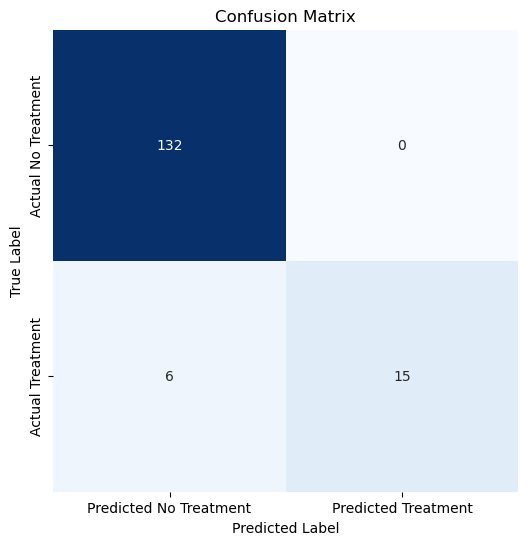

In [52]:
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from pyswarm import pso

# Load the dataset
df = df_temp  # Replace with your file name

# Selecting the input variables (features) and the target variable (target)
X = df[['phq_score', 'gad_score', 'gender', 'school_year', 'age', 'anxiousness', 'anxiety_diagnosis',
        'anxiety_treatment', 'epworth_score', 'sleepiness']]
y = df['treatment_status']

# Define the objective function for PSO
def objective_function(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return 1 - np.mean(scores)  # PSO minimizes the objective function

# Define the parameter bounds for PSO
lb = [1e-6, 1e-6]  # lower bounds for C and gamma
ub = [10.0, 10.0]   # upper bounds for C and gamma

# Perform PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub)

# Extract the optimal hyperparameters
optimal_C, optimal_gamma = best_params

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the SVM model with optimal hyperparameters
optimal_model = SVC(C=optimal_C, gamma=optimal_gamma)

# Training the model with training data
optimal_model.fit(X_train, y_train)

# Making predictions on test data
y_pred = optimal_model.predict(X_test)

# Calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Computing and printing F1-score
f1score = f1_score(y_test, y_pred)
print("F1-Score:", f1score)

# Plotting AUC and ROC curve using Plotly
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig_roc = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={roc_auc:.2f})',
                  labels=dict(x='False Positive Rate', y='True Positive Rate'),
                  width=700, height=500)
fig_roc.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig_cm = px.imshow(cm, labels=dict(x="Predicted", y="True"),
                   x=['No Treatment', 'Treatment'], y=['No Treatment', 'Treatment'],
                   title='Confusion Matrix')
fig_cm.update_layout(width=500, height=400)

# Computing and plotting precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
fig_pr_curve = px.line(x=recall, y=precision, title='Precision-Recall Curve',
                       labels=dict(x='Recall', y='Precision'),
                       width=700, height=500)

# Display plots
fig_roc.show()
fig_cm.show()
fig_pr_curve.show()


conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'],
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
y_test

367    0
267    1
769    0
200    0
343    0
      ..
65     0
569    0
352    0
334    0
252    0
Name: treatment_status, Length: 153, dtype: int32

In [54]:
y_test, y_pred

(367    0
 267    1
 769    0
 200    0
 343    0
       ..
 65     0
 569    0
 352    0
 334    0
 252    0
 Name: treatment_status, Length: 153, dtype: int32,
 array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [55]:
fpr

array([0., 0., 1.])

In [56]:
tpr

array([0.        , 0.71428571, 1.        ])

We have little data, I will use the oversampling technique, we have more women than men in the Federal District, especially in treatment

In [57]:
data_majority = df[df['treatment_status'] == 0]
data_minority = df[df['treatment_status'] == 1]


In [58]:
data_minority_oversampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)


In [59]:
df_oversampled = pd.concat([data_majority, data_minority_oversampled])


Accuracy: 0.9120879120879121
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       144
           1       0.98      0.83      0.90       129

    accuracy                           0.91       273
   macro avg       0.92      0.91      0.91       273
weighted avg       0.92      0.91      0.91       273

Accuracy: 0.9120879120879121
F1-Score: 0.8991596638655462


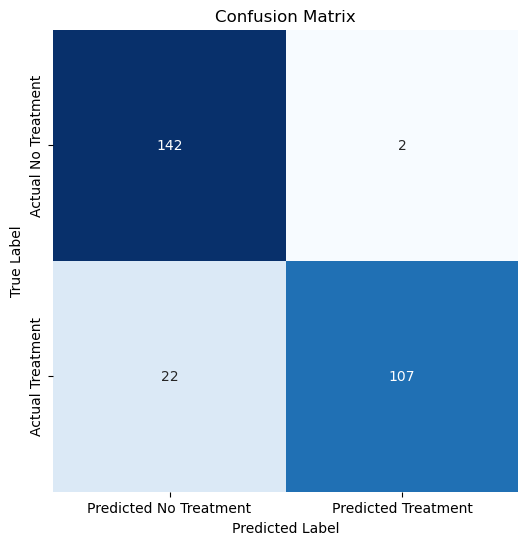

In [60]:
# Split the data into training and testing sets
X = df_oversampled[['phq_score', 'gad_score', 'gender', 'school_year', 'age', 'anxiousness', 'anxiety_diagnosis',
                    'anxiety_treatment', 'epworth_score', 'sleepiness']]
y = df_oversampled['treatment_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and adjust the model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Computing and printing F1-score
f1score = f1_score(y_test, y_pred)
print("F1-Score:", f1score)

## ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig_roc = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={roc_auc:.2f})',
                  labels=dict(x='False Positive Rate', y='True Positive Rate'),
                  width=700, height=500)
fig_roc.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

#CONFUSION MATRIX
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'],
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
# Split the data into training and testing sets
X = df_oversampled[['phq_score', 'gad_score', 'gender', 'school_year', 'age', 'anxiousness', 'anxiety_diagnosis',
                    'anxiety_treatment', 'epworth_score', 'sleepiness']]
y = df_oversampled['treatment_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for PSO
def objective_function(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return 1 - np.mean(scores)  # PSO minimizes the objective function

# Define the parameter bounds for PSO
lb = [1e-6, 1e-6]  # lower bounds for C and gamma
ub = [10.0, 10.0]   # upper bounds for C and gamma

# Perform PSO to find the optimal hyperparameters
best_params, _ = pso(objective_function, lb, ub)

# Extract the optimal hyperparameters
optimal_C, optimal_gamma = best_params

# Create and adjust the model with optimal hyperparameters
optimal_model = SVC(C=optimal_C, gamma=optimal_gamma)
optimal_model.fit(X_train, y_train)

# Make predictions
y_pred = optimal_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Stopping search: maximum iterations reached --> 100
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       129

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273



**Final observations:**

*In the last model we developed, we observed a slight decrease in the coefficient of determination (R²), but we noticed an increase in all other evaluation measures. The reason for this behavior is that now our model can more effectively distinguish '1' cases from '0' cases. This resulted in improved overall effectiveness. The oversampling strategy, which involved increasing the representation of less frequent cases, was applied here. Although this technique is not always recommended, it had an interesting result for the problem we are addressing.*

*Our main goal here is to understand why men who have similar results to women on the GAD and PHQ tests are not seeking treatment. This analysis can provide valuable insights to create algorithms and strategies that encourage men to seek help, as women already do. A reflection of this is the discrepancy in our data set, where we observed a significantly greater presence of women. These insights could be crucial to improving access to and awareness of men's mental health.*

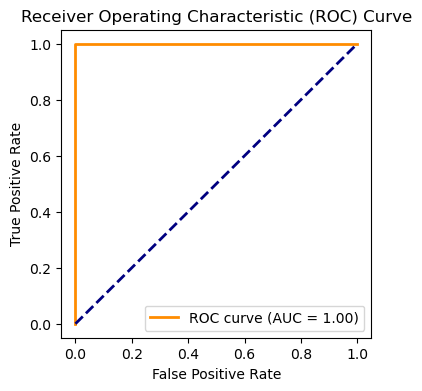

In [62]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Randomly generate a binary array (ground truth)
np.random.seed(42)
y_true = np.random.randint(2, size=100)

# Randomly generate an array of probabilities (predicted probabilities)
y_scores = np.random.rand(100)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig_roc = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={roc_auc:.2f})',
                  labels=dict(x='False Positive Rate', y='True Positive Rate'),
                  width=700, height=500)
fig_roc.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Computing and printing F1-score
f1score = f1_score(y_test, y_pred)
print("F1-Score:", f1score)

Accuracy: 1.0
F1-Score: 1.0


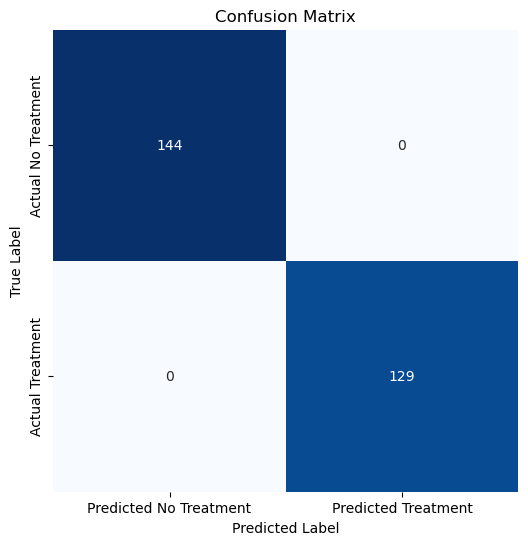

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'],
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()